In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import spacy
NLP = spacy.load('en')

In [2]:
INPUT_FOLDER = './log_alpha_statistics/'
SWAP_REGEX = '\"SwappedWords:(\d+)\"$'

In [3]:
def addToDict(dictionary, word):
    if word not in dictionary:
        dictionary[word] = 1
    else:
        dictionary[word] += 1   

In [4]:
def parseSwappedId(max, folder = INPUT_FOLDER):
    for filename in os.listdir(folder):
        if max == 0:
            break
        filepath = folder + filename
        with open(filepath, "r") as f:
            for line in f:
                matcher = re.search(SWAP_REGEX, line)
                if matcher is not None:
                    yield matcher.group(1)
        if max % 2 == 0:
            print -max,
        max = max - 1

In [5]:
replacedRandom = {}
for wordID in parseSwappedId(-1):
    addToDict(replacedRandom, wordID)

2 4 6 8 10 12 14


 From sentence drop random...
                word  wcount
165925  445063888896       1
165924  283836940288       1
165923  442959396864       1
165922  251419164672       1
165921  138007281664       1
165920   45953843200       1
165919   76835454976       1
165918  223447351296       1
165946  224175063040       1
497781   73640443904       1
                word  wcount
0       309685387264       1
331862   21091057665       1
331861  459206033408       1
331860  448929988608       1
331859  186867777536       1
331858  134351945728       1
331857  263347765248       1
331856   30475812865       1
331855   16946036736       1
331854  191771967488       1


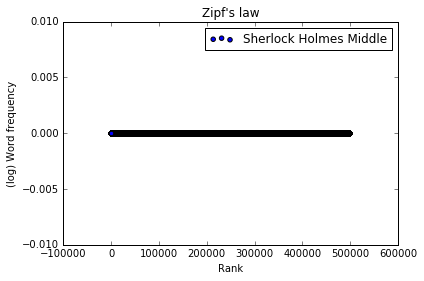

In [6]:
replacedRandomDf = pd.DataFrame.from_dict(replacedRandom.items())
replacedRandomDf.columns = ['word', 'wcount']
print " From sentence drop random..."
print replacedRandomDf.sort_values('wcount').tail(10)
print replacedRandomDf.sort_values('wcount').head(10)
fig = plt.figure
ax = plt.scatter((range(len(replacedRandomDf) + 1, 1, -1)), 
                 np.log(replacedRandomDf.sort_values('wcount').wcount), 
                 label = 'Sherlock Holmes Middle' )
plt.title("Zipf's law")
plt.legend()
plt.ylabel('(log) Word frequency')
plt.xlabel('Rank')

 From sentence drop random...
                word  wcount
165925  445063888896       1
165924  283836940288       1
165923  442959396864       1
165922  251419164672       1
165921  138007281664       1
165920   45953843200       1
165919   76835454976       1
165918  223447351296       1
165946  224175063040       1
497781   73640443904       1
                word  wcount
0       309685387264       1
331862   21091057665       1
331861  459206033408       1
331860  448929988608       1
331859  186867777536       1
331858  134351945728       1
331857  263347765248       1
331856   30475812865       1
331855   16946036736       1
331854  191771967488       1


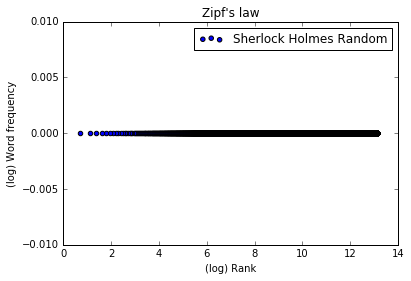

In [7]:
replacedRandomDf = pd.DataFrame.from_dict(replacedRandom.items())
replacedRandomDf.columns = ['word', 'wcount']
print " From sentence drop random..."
print replacedRandomDf.sort_values('wcount').tail(10)
print replacedRandomDf.sort_values('wcount').head(10)
fig = plt.figure
ax = plt.scatter(np.log(range(len(replacedRandomDf) + 1, 1, -1)), 
                 np.log(replacedRandomDf.sort_values('wcount').wcount), 
                 label = 'Sherlock Holmes Random' )
plt.title("Zipf's law")
plt.legend()
plt.ylabel('(log) Word frequency')
plt.xlabel('(log) Rank')

In [54]:
import spacy

In [57]:
NLP = spacy.load('en')

In [60]:
NLP.is_stop('the')

1

In [8]:
from enum import Enum

CORPUS_TYPE = Enum('CORPUS_TYPE', 'SAME_PASSAGE RANDOM_PASSAGE')



In [13]:
CORPUS_TYPE.RANDOM_PASSAGE

<CORPUS_TYPE.RANDOM_PASSAGE: 2>